In [1]:
import matplotlib.colorbar as colorbar
import matplotlib.colors as mplcolours
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

In [2]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
land = 1-mesh.tmask[0, 0]

In [3]:
imin, imax = 100, 400
jmin, jmax = 100, 350

In [4]:
watercolour = 'lightskyblue'
landcolour = 'papayawhip'
waterland_cmap = mplcolours.LinearSegmentedColormap.from_list('mycmap', [(0, watercolour),  (0.85, watercolour), 
                                                    (0.850001, landcolour), (1, landcolour)])

In [5]:
results = xr.open_dataset('/data/sallen/results/MIDOSS/AKNS_dispersion19/Lagrangian_AKNS_crude_15jan18-22jan18_AKNS.nc')
scale = 86400 * 1e9
(results.Beaching_Time[:].max()-results.Beaching_Time[:].min())/scale

<xarray.DataArray 'Beaching_Time' ()>
array(6, dtype='timedelta64[ns]')

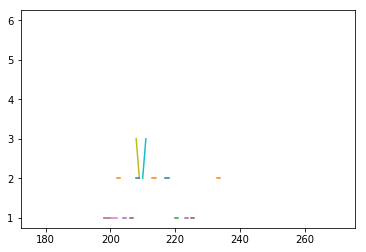

In [6]:
days = np.ma.masked_array((results.Beaching_Time[imin:imax, jmin:jmax]-results.Beaching_Time[:].min())/scale,
                         results.Beaching_Time[imin:imax, jmin:jmax] == results.Beaching_Time[:].min())
#plt.plot((results.Beaching_Time[imin:imax, jmin:jmax]-results.Beaching_Time[:].min())/scale);
plt.plot(days);

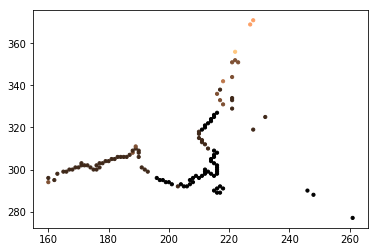

In [7]:
xs = range(jmin, jmax)
ys = range(imin, imax)
xx, yy = np.meshgrid(xs, ys)
plt.scatter(xx, yy, s=10, c=days, cmap='copper');

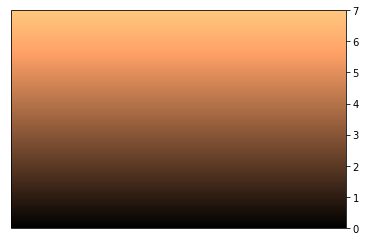

In [13]:
fig, ax = plt.subplots(1, 1)
cnorm = mplcolours.Normalize(vmin=0, vmax=7)
colorbar.ColorbarBase(ax, cmap='copper', norm=cnorm);

In [8]:
results.OilWaterColumnOilVol_3D

<xarray.DataArray 'OilWaterColumnOilVol_3D' (time: 156, grid_z: 40, grid_y: 896, grid_x: 396)>
[2214051840 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2018-01-15T00:30:00 ... 2018-01-21T11:30:00
  * grid_y   (grid_y) int16 0 1 2 3 4 5 6 7 ... 888 889 890 891 892 893 894 895
  * grid_x   (grid_x) int16 0 1 2 3 4 5 6 7 ... 388 389 390 391 392 393 394 395
  * grid_z   (grid_z) int16 0 1 2 3 4 5 6 7 8 9 ... 31 32 33 34 35 36 37 38 39
Attributes:
    standard_name:  OilWaterColumnOilVol_3D
    long_name:      OilWaterColumnOilVol_3D
    units:          m3/gridcell

In [9]:
oilwaterhours = np.ma.masked_array(results.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0)/(440*500)*1000, 
                                  mask = results.OilWaterColumnOilVol_3D[:, 39, imin:imax, jmin:jmax].sum(axis=0)/(440*500)*1000
                                   < 0.004)

In [10]:
beachvol = np.ma.masked_array(results.Beaching_Volume[imin:imax, jmin:jmax],
                         mask = results.Beaching_Volume[imin:imax, jmin:jmax] == 0)

In [11]:
print (beachvol.max()/440/500*1000)

0.18833146875494242


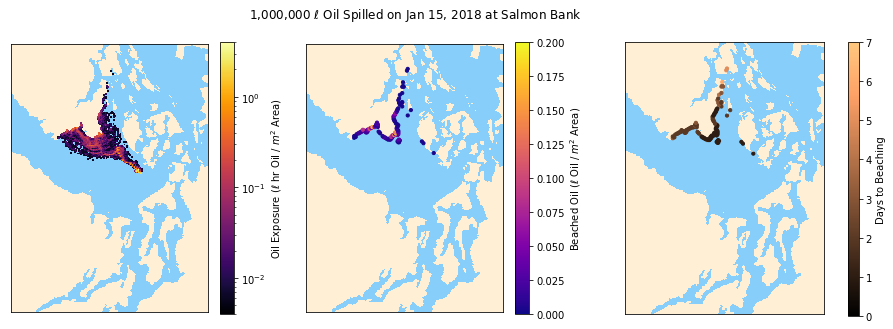

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax in axs:
    ax.set_aspect(500/440.)
    ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.pcolormesh(land[imin:imax, jmin:jmax], cmap=waterland_cmap)
axs[2].scatter(xx-jmin, yy-imin, s=10, c=days, cmap='copper', vmin=0, vmax=7);
ax_cbar = fig.add_axes([0.9, 0.12, 0.01, 0.76])
cb = colorbar.ColorbarBase(ax_cbar, cmap='copper', norm=cnorm);
cb.set_label('Days to Beaching')
colours = axs[0].pcolormesh(xx-jmin, yy-imin, 
                  oilwaterhours, cmap='inferno', norm=mplcolours.LogNorm(0.004, 4));
cb = fig.colorbar(colours, ax=axs[0])
cb.set_label('Oil Exposure ($\ell$ hr Oil / $m^2$ Area)')
colours = axs[1].scatter(xx-jmin, yy-imin, s=10, c=beachvol/(440*500)*1000, cmap='plasma', vmin=0, vmax=0.2);
cb = fig.colorbar(colours, ax=axs[1])
cb.set_label('Beached Oil ($\ell$ Oil / $m^2$ Area)')
fig.suptitle('1,000,000 $\ell$ Oil Spilled on Jan 15, 2018 at Salmon Bank');